# Neural Network Dropout Extension with Keras

In [9]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 
import time

## 1. MNIST Dataset

### Keras implementation

In [7]:
digits=load_digits()
X = digits.data
y = digits.target

# Scale training features
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)

In [8]:
# Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [9]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [10]:
# Convert digits to vectors
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
# Define the keras model
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))

# Compile the keras model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])

In [29]:
# Train the keras model
model.fit(X_train, y_v_train, epochs = 150, batch_size = 1)

Epoch 1/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.1002 - accuracy: 0.2171
Epoch 2/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0734 - accuracy: 0.4091
Epoch 3/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0553 - accuracy: 0.5955
Epoch 4/150
1078/1078 [==============================] - 1s 1ms/step - loss: 0.0450 - accuracy: 0.6781
Epoch 5/150
1078/1078 [==============================] - 1s 1ms/step - loss: 0.0402 - accuracy: 0.7217
Epoch 6/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0361 - accuracy: 0.7560
Epoch 7/150
1078/1078 [==============================] - 2s 1ms/step - loss: 0.0307 - accuracy: 0.8098
Epoch 8/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0264 - accuracy: 0.8321
Epoch 9/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0241 - accuracy: 0.8451
Epoch 10/150
1078/1078 [==============================] - 2s 1ms/step - l

In [30]:
# Evaluate the keras model
accuracy = model.evaluate(X_test, y_v_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

719/719 [==============================] - 0s 177us/step
Accuracy: 96.38


### Keras implementation plus extension

In [49]:
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD

# Define the keras model with softmax outer layer
model_plus_ext = Sequential()
model_plus_ext.add(Dense(64, activation='sigmoid', kernel_constraint = maxnorm(3)))
model_plus_ext.add(Dropout(0.2))
model_plus_ext.add(Dense(30, activation='sigmoid', kernel_constraint = maxnorm(3)))
model_plus_ext.add(Dropout(0.2))
model_plus_ext.add(Dense(10, activation='sigmoid'))

# Compile the keras model
sgd = SGD(lr=0.1, momentum=0.9)
model_plus_ext.compile(loss='mean_squared_error', optimizer=sgd, metrics = ['accuracy'])

In [50]:
# Train the keras model
model_plus_ext.fit(X_train, y_v_train, epochs = 150, batch_size = 1)

Epoch 1/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0894 - accuracy: 0.2199
Epoch 2/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0681 - accuracy: 0.5046
Epoch 3/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0456 - accuracy: 0.7180
Epoch 4/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0350 - accuracy: 0.7950
Epoch 5/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0278 - accuracy: 0.8599
Epoch 6/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0231 - accuracy: 0.8794
Epoch 7/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0186 - accuracy: 0.9174
Epoch 8/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0159 - accuracy: 0.9230
Epoch 9/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0150 - accuracy: 0.9286
Epoch 10/150
1078/1078 [==============================] - 2s 2ms/step - l

In [51]:
# Evaluate the keras model
accuracy = model_plus_ext.evaluate(X_test, y_v_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

719/719 [==============================] - 0s 228us/step
Accuracy: 97.77


## 2. Fashion-MNIST

### Keras implementation

In [4]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

Using TensorFlow backend.


In [5]:
X_train = trainX
y_train = trainY
X_test = testX
y_test = testY

In [6]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

The shape of the digits dataset:
(60000, 28, 28)


<Figure size 432x288 with 0 Axes>

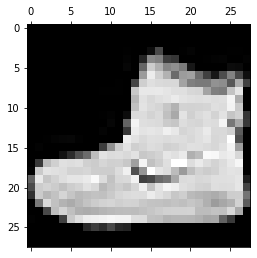

[9]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 23

In [10]:
print("The shape of the digits dataset:") 
print(X_train.shape)
plt.gray()
plt.matshow(X_train[0])
plt.show()
print(y_train[0:1])
print(X_train[0,:])

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
# Scale the dataset

X_scale = StandardScaler()
X_train = [X_scale.fit_transform(X_train[i]).flatten() for i in range(len(X_train))]

In [13]:
X_test = [X_scale.fit_transform(X_test[i]).flatten() for i in range(len(X_test))]



In [14]:
X_train[0] # Looking at the new features after scaling

array([-0.34062577, -0.48590849, -0.55368775, -0.57830472, -0.61724799,
       -0.65473466, -0.66524031, -0.69031625, -0.71089238, -0.73827078,
       -0.77682253, -0.7644687 , -0.90444624, -1.24217044, -1.49218887,
       -1.6432188 , -1.7458434 , -1.58582058, -1.56547495, -1.51925798,
       -1.44902444, -1.39545527, -1.35520903, -1.32176483, -1.33646764,
       -1.31334192, -1.22103858, -0.55220401, -0.34062577, -0.48590849,
       -0.55368775, -0.57830472, -0.61724799, -0.65473466, -0.66524031,
       -0.69031625, -0.71089238, -0.73827078, -0.77682253, -0.7644687 ,
       -0.90444624, -1.24217044, -1.49218887, -1.6432188 , -1.7458434 ,
       -1.58582058, -1.56547495, -1.51925798, -1.44902444, -1.39545527,
       -1.35520903, -1.32176483, -1.33646764, -1.31334192, -1.22103858,
       -0.55220401, -0.34062577, -0.48590849, -0.55368775, -0.57830472,
       -0.61724799, -0.65473466, -0.66524031, -0.69031625, -0.71089238,
       -0.73827078, -0.77682253, -0.7644687 , -0.90444624, -1.24

In [15]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
# Downsample the data

# Add y_train back as an additional column to X_train
y_train = y_train.reshape((-1,1))
X_train = np.append(X_train, y_train, axis=1)

# Add y_test back as an additional column to X_test
y_test = y_test.reshape((-1,1))
X_test = np.append(X_test, y_test, axis=1)

# Shuffle the data
np.random.shuffle(X_train)
np.random.shuffle(X_test)

# Slice out only the first 1078 from X_train and 719 from X_test
X_train = X_train[0:1078]
X_test = X_test[0:719]

# Remove the last columns of X_train and X_test and place them back into y_train and y_test
y_train = X_train[:,-1]
y_test = X_test[:,-1]
X_train = X_train[:,0:X_train.shape[1]-1]
X_test = X_test[:,0:X_test.shape[1]-1]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1078, 784)
(1078,)
(719, 784)
(719,)


In [20]:
print(int(y_train[0]))

4


In [22]:
# Convert digits to vectors
y_v_train = convert_y_to_vect(y_train.astype(np.int))
y_v_test = convert_y_to_vect(y_test.astype(np.int))

(28, 28)
The shape of the digits dataset:
(1078, 784)


<Figure size 432x288 with 0 Axes>

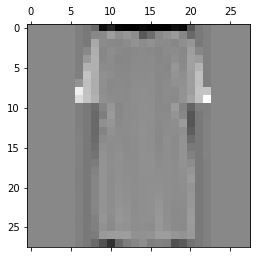

3.0


In [23]:
# Show that newly downsampled X_train still matches with y_train
# Here we display a pullover with label of 2 which is correct

X_train_test = np.zeros((28,28))
for i in range(28):
    X_train_test[i] = X_train[3][28*i:28*i+28]
print(X_train_test.shape)

print("The shape of the digits dataset:") 
print(X_train.shape)
plt.gray()
plt.matshow(X_train_test)
plt.show()
print(y_train[3])

(28, 28)
The shape of the digits dataset:
(1078, 784)


<Figure size 432x288 with 0 Axes>

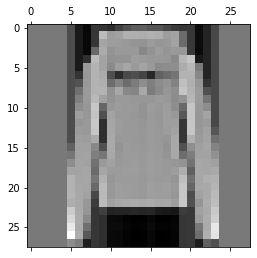

2.0


In [24]:
# Again we show that, as expected, an image of an ankle boot has a label of 9

X_train_test2 = np.zeros((28,28))
for i in range(28):
    X_train_test2[i] = X_train[435][28*i:28*i+28]
print(X_train_test2.shape)

print("The shape of the digits dataset:") 
print(X_train.shape)
plt.gray()
plt.matshow(X_train_test2)
plt.show()
print(y_train[435])

In [25]:
# Convert digits to vectors (one hot encoding)
y_v_train = convert_y_to_vect(y_train.astype(np.int))
y_v_test = convert_y_to_vect(y_test.astype(np.int))

In [33]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
# Define the keras model
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))

# Compile the keras model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])

In [35]:
# Train the keras model
model.fit(X_train, y_v_train, epochs = 150, batch_size = 1)

Epoch 1/150
1078/1078 [==============================] - 3s 3ms/step - loss: 0.0940 - accuracy: 0.3256
Epoch 2/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.5009
Epoch 3/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0574 - accuracy: 0.5510
Epoch 4/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0516 - accuracy: 0.5918
Epoch 5/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0475 - accuracy: 0.6113
Epoch 6/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0451 - accuracy: 0.6187
Epoch 7/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0434 - accuracy: 0.6262
Epoch 8/150
1078/1078 [==============================] - 3s 3ms/step - loss: 0.0413 - accuracy: 0.6531
Epoch 9/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0380 - accuracy: 0.6883
Epoch 10/150
1078/1078 [==============================] - 3s 3ms/step - l

In [36]:
# Evaluate the keras model
accuracy = model.evaluate(X_test, y_v_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

719/719 [==============================] - 0s 245us/step
Accuracy: 62.73


### Keras implementation plus extension

In [37]:
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD

# Define the keras model with softmax outer layer
model_plus_ext = Sequential()
model_plus_ext.add(Dense(64, activation='sigmoid', kernel_constraint = maxnorm(3)))
model_plus_ext.add(Dropout(0.2))
model_plus_ext.add(Dense(30, activation='sigmoid', kernel_constraint = maxnorm(3)))
model_plus_ext.add(Dropout(0.2))
model_plus_ext.add(Dense(10, activation='sigmoid'))

# Compile the keras model
sgd = SGD(lr=0.1, momentum=0.9)
model_plus_ext.compile(loss='mean_squared_error', optimizer=sgd, metrics = ['accuracy'])

In [38]:
# Train the keras model
model_plus_ext.fit(X_train, y_v_train, epochs = 150, batch_size = 1)

Epoch 1/150
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0816 - accuracy: 0.3442
Epoch 2/150
1078/1078 [==============================] - 4s 3ms/step - loss: 0.0566 - accuracy: 0.5909
Epoch 3/150
1078/1078 [==============================] - 4s 3ms/step - loss: 0.0486 - accuracy: 0.6531
Epoch 4/150
1078/1078 [==============================] - 4s 3ms/step - loss: 0.0402 - accuracy: 0.7384
Epoch 5/150
1078/1078 [==============================] - 4s 4ms/step - loss: 0.0354 - accuracy: 0.7811
Epoch 6/150
1078/1078 [==============================] - 4s 4ms/step - loss: 0.0303 - accuracy: 0.8182
Epoch 7/150
1078/1078 [==============================] - 4s 4ms/step - loss: 0.0266 - accuracy: 0.8432
Epoch 8/150
1078/1078 [==============================] - 5s 4ms/step - loss: 0.0226 - accuracy: 0.8673
Epoch 9/150
1078/1078 [==============================] - 5s 4ms/step - loss: 0.0214 - accuracy: 0.8785
Epoch 10/150
1078/1078 [==============================] - 5s 5ms/step - l

In [39]:
# Evaluate the keras model
accuracy = model_plus_ext.evaluate(X_test, y_v_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

719/719 [==============================] - 0s 300us/step
Accuracy: 77.19
